In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

Load the dataset and Data Pre-processing

In [64]:
data = pd.read_csv('28.csv')
display(data)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [65]:
data.shape

(2200, 8)

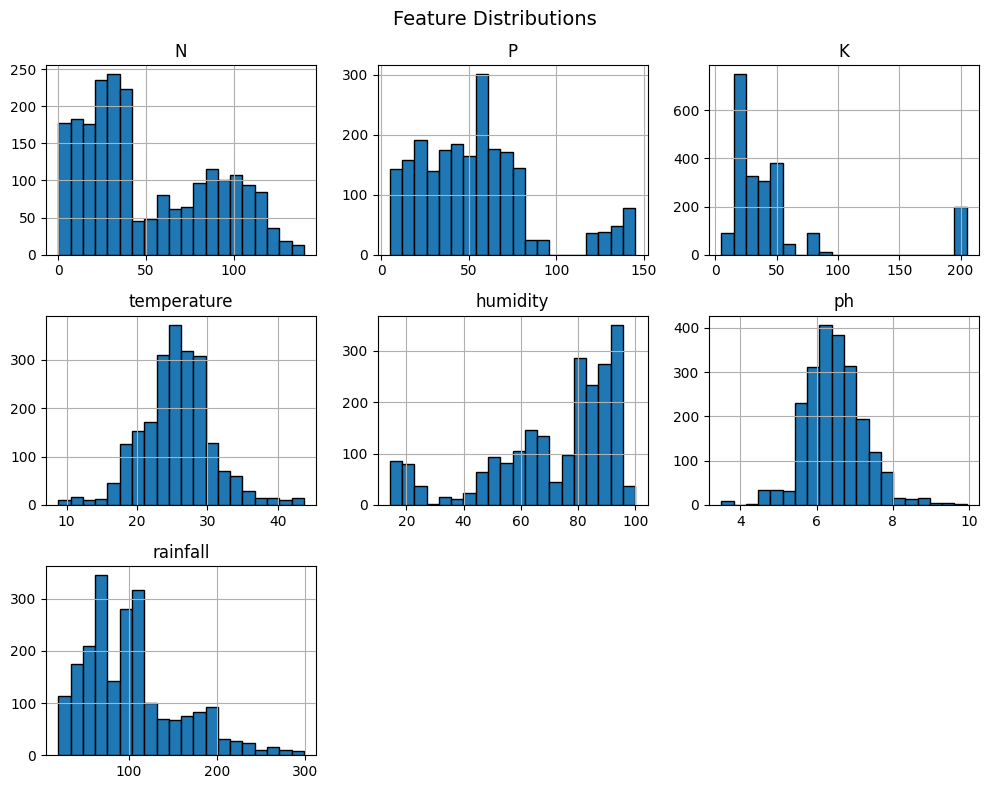

In [66]:
data.hist(figsize=(10, 8), bins=20, edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=14)
plt.tight_layout()
plt.show()

C:\Users\Pragati Nayak\AppData\Local\Temp\ipykernel_2908\2281091768.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=data, order=data['label'].value_counts().index, palette='Set2')


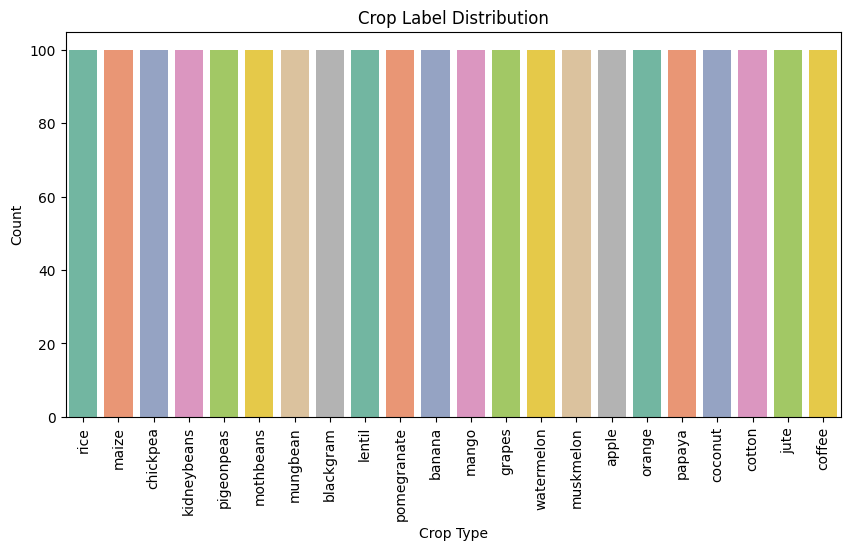

In [67]:
plt.figure(figsize=(10,5))
sns.countplot(x='label', data=data, order=data['label'].value_counts().index, palette='Set2')
plt.xticks(rotation=90)
plt.title("Crop Label Distribution")
plt.xlabel("Crop Type")
plt.ylabel("Count")
plt.show()

In [68]:
print(data.isnull().sum())

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


In [69]:
print("Unique labels:", data['label'].unique())

Unique labels: ['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']


In [70]:
print("Count of each label:")
print(data['label'].value_counts())

Count of each label:
label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64


In [71]:
num_labels = data['label'].nunique()
print("Number of unique labels:", num_labels)

Number of unique labels: 22


In [72]:
duplicate_rows = data[data.duplicated()]
print("Number of duplicate rows:", duplicate_rows.shape[0])

Number of duplicate rows: 0


=> No missing values, no duplicate entries and total 22 unique labels and data are balanced

Input features and target features

In [73]:
X = data.drop(columns=['label'])
y = data['label']

In [74]:
X

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [75]:
y

0         rice
1         rice
2         rice
3         rice
4         rice
         ...  
2195    coffee
2196    coffee
2197    coffee
2198    coffee
2199    coffee
Name: label, Length: 2200, dtype: object

In [76]:
le = LabelEncoder()
y_enc = le.fit_transform(y)

In [77]:
y_enc

array([20, 20, 20, ...,  5,  5,  5], shape=(2200,))

In [78]:
y_enc.shape

(2200,)

Splitting the dataset into training and testing sets

In [79]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_enc, test_size=0.2, random_state=42, stratify=y_enc
)

In [80]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1760, 7), (440, 7), (1760,), (440,))

In [81]:
X_train

,N,P,K,temperature,humidity,ph,rainfall
1607,0,18,14,29.771494,92.007200,7.207991,114.416179
1212,9,122,201,29.587484,80.919344,5.570291,68.064173
362,11,71,24,21.140114,22.718235,5.606620,141.605672
566,38,38,18,26.310518,61.187491,6.294130,35.734038
1671,18,12,8,12.590940,91.816688,6.206053,119.391672
...,...,...,...,...,...,...,...
808,13,64,20,19.134577,62.575269,6.590571,36.469470
422,16,55,19,19.543141,47.191883,6.413544,192.437219
2052,82,48,36,25.793520,81.769040,6.352077,193.241838
2083,90,50,44,26.916437,73.486560,6.253409,171.471638


In [82]:
y_train

array([16,  7,  9, ...,  8,  8,  7], shape=(1760,))

In [83]:
unique, counts = np.unique(y_train, return_counts=True)
for u, c in zip(unique, counts):
    print(f"{u}: {c}")

0: 80
1: 80
2: 80
3: 80
4: 80
5: 80
6: 80
7: 80
8: 80
9: 80
10: 80
11: 80
12: 80
13: 80
14: 80
15: 80
16: 80
17: 80
18: 80
19: 80
20: 80
21: 80


In [84]:
y_test

array([16,  1,  6, 11, 16,  3, 20,  2,  1, 16, 21, 19, 21, 11, 13,  7,  7,
       12, 12,  0,  2,  0, 13,  9,  0,  8, 13, 21, 20,  5, 12,  8,  1,  5,
        8,  2,  7,  7,  2,  8,  4, 17, 12, 11, 10,  8,  6, 10,  3, 14, 17,
       19, 18, 21, 12,  2, 17, 17,  5, 10, 10, 13,  5,  1, 17, 20, 16,  4,
        2, 19,  1, 15, 21, 10,  1,  4, 13, 14, 14, 12,  5, 21, 15,  9, 12,
       19, 16,  6,  4, 17, 13, 14, 13,  6,  8,  7,  6,  3,  8, 21, 15, 19,
       16, 18, 18,  7,  9, 10, 20, 20,  0, 14, 14,  7, 20, 15,  2, 10,  1,
       16, 16,  3, 11, 12, 11, 10,  1, 19,  4, 14,  6,  3,  8, 14, 13, 11,
        0,  3, 20, 11,  6,  8, 19, 12, 20, 17,  1, 16, 18, 10, 11,  3,  6,
       21, 13, 11, 18, 15,  0, 14,  2,  3, 11, 11,  9,  5, 16, 11,  7, 19,
        0,  4, 15,  7,  6, 10, 18,  3,  2, 13,  0, 15,  6, 21, 15, 21, 16,
       21,  5,  9,  0,  3,  2,  5, 15,  5,  0,  7,  8, 17,  4,  7, 21, 14,
       19, 18, 14, 10, 17, 15,  3,  0, 11,  3,  1, 19, 19, 11, 16,  8,  6,
        6, 11,  7, 14, 10

In [85]:
unique, counts = np.unique(y_test, return_counts=True)
for u, c in zip(unique, counts):
    print(f"{u}: {c}")

0: 20
1: 20
2: 20
3: 20
4: 20
5: 20
6: 20
7: 20
8: 20
9: 20
10: 20
11: 20
12: 20
13: 20
14: 20
15: 20
16: 20
17: 20
18: 20
19: 20
20: 20
21: 20


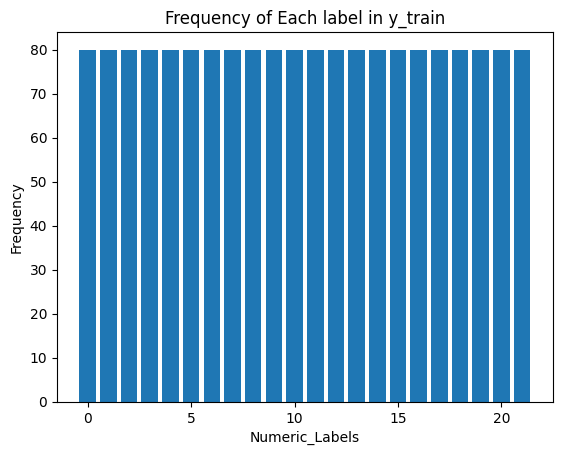

In [86]:
unique, counts = np.unique(y_train, return_counts=True)
plt.bar(unique, counts)
plt.xlabel("Numeric_Labels")
plt.ylabel("Frequency")
plt.title("Frequency of Each label in y_train")
plt.show()

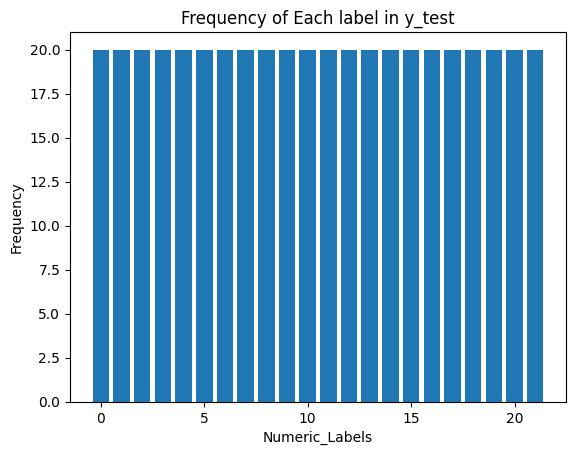

In [87]:
unique, counts = np.unique(y_test, return_counts=True)
plt.bar(unique, counts)
plt.xlabel("Numeric_Labels")
plt.ylabel("Frequency")
plt.title("Frequency of Each label in y_test")
plt.show()

Training Random Forest with random value of n_estimators

In [88]:
rf_baseline = RandomForestClassifier(n_estimators=10, random_state=42, n_jobs=-1)
rf_baseline.fit(X_train, y_train)
y_pred_baseline = rf_baseline.predict(X_test)

Performance of the model

In [89]:
print("Random Forest Performance")
print("Accuracy:", accuracy_score(y_test, y_pred_baseline))
print("Precision (macro):", precision_score(y_test, y_pred_baseline, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred_baseline, average='macro'))
print("F1 (macro):", f1_score(y_test, y_pred_baseline, average='macro'))
print("F1 (micro):", f1_score(y_test, y_pred_baseline, average='micro'))
print("\nClassification Report:\n", classification_report(y_test, y_pred_baseline, target_names=le.classes_))
print("Confusion Matrix:\n", pd.DataFrame(confusion_matrix(y_test, y_pred_baseline), index=le.classes_, columns=le.classes_))

Random Forest Performance
Accuracy: 0.9931818181818182
Precision (macro): 0.9937032664305392
Recall (macro): 0.993181818181818
F1 (macro): 0.9931690047222781
F1 (micro): 0.9931818181818182

Classification Report:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       1.00      0.95      0.97        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        20
        jute       0.91      1.00      0.95        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        20
       maize       0.95      1.00      0.98        20
       mango       1.00      1.00      1.00        20
   mothbeans       1.00      

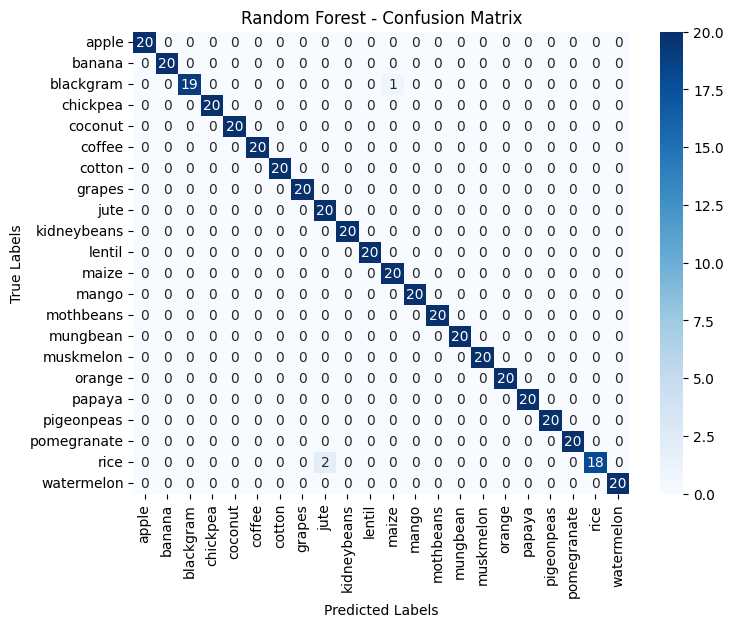

In [90]:
cm = confusion_matrix(y_test, y_pred_baseline)
labels = le.classes_  

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [91]:
pipeline = Pipeline([ 
    ('rf', RandomForestClassifier(random_state=42, n_jobs=-1))
])

Tune the model, defining the range of hyperparameter value

In [92]:
param_grid = {
    'rf__n_estimators': [10,20, 30, 40, 50, 70, 80, 100],
    'rf__max_depth': [None, 20, 30],
    'rf__min_samples_split': [2, 3, 4],
    'rf__min_samples_leaf': [1, 2],
    'rf__class_weight': [None, 'balanced']
}

GridSearchCV with stratified CV

In [93]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='f1_macro',
    cv=cv,
    n_jobs=-1,
    verbose=1
)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


,estimator,Pipeline(step...m_state=42))])
,param_grid,"{'rf__class_weight': [None, 'balanced'], 'rf__max_depth': [None, 20, ...], 'rf__min_samples_leaf': [1, 2], 'rf__min_samples_split': [2, 3, ...], ...}"
,scoring,'f1_macro'
,n_jobs,-1
,refit,True
,cv,StratifiedKFo... shuffle=True)
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,30


In [94]:
print("\nBest hyperparameters:")
print(grid.best_params_)
print("Best CV f1_macro:", grid.best_score_)


Best hyperparameters:
{'rf__class_weight': None, 'rf__max_depth': None, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 4, 'rf__n_estimators': 30}
Best CV f1_macro: 0.9960154939075071


On tuned parameter value

In [95]:
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

In [96]:
print("\nTuned Random Forest Performance on Test Set")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision (macro):", precision_score(y_test, y_pred, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred, average='macro'))
print("F1 (macro):", f1_score(y_test, y_pred, average='macro'))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))
print("Confusion Matrix:\n", pd.DataFrame(confusion_matrix(y_test, y_pred),
                                          index=le.classes_, columns=le.classes_))


Tuned Random Forest Performance on Test Set
Accuracy: 0.9954545454545455
Precision (macro): 0.9956709956709957
Recall (macro): 0.9954545454545454
F1 (macro): 0.9954517027687758

Classification Report:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       1.00      0.95      0.97        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        20
        jute       0.95      1.00      0.98        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        20
       maize       0.95      1.00      0.98        20
       mango       1.00      1.00      1.00        20
   mothbeans       1.00      1.00      1

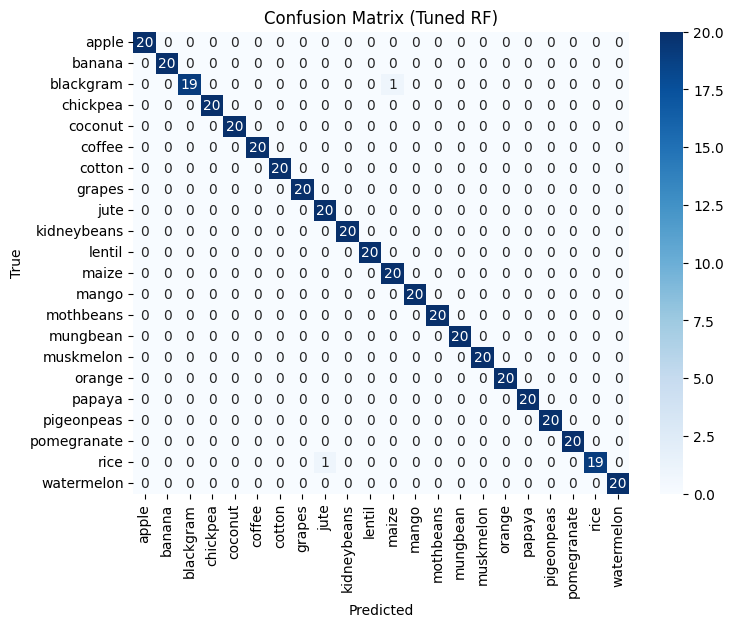

In [97]:
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=le.classes_, columns=le.classes_)

plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix (Tuned RF)")
plt.show()